### Reading and understanding data

In [4]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [6]:
# reading data from day.csv
bike = pd.read_csv("day.csv")

In [7]:
# looking 5 first rows of data
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# looking information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike.shape

(730, 16)

In [10]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# checking null values of each column
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# create new datafrme for checking duplicates
bike_copy = bike.copy()

In [13]:
# looking new dataframe's shape
bike_copy.shape

(730, 16)

In [14]:
# dropping of duplicates
bike_copy.drop_duplicates(inplace=True)

In [15]:
# looking new dataframe's shape again
bike_copy.shape

(730, 16)

The shape of the origincal dataframe and the shape after dropping the duplicate columns are same, hence we can assume that there were no duplicate values in the dataset.

### Data Cleaning

##### Checking Junk Data

In [16]:
# create dummy data for checking unique values and value_counts
bike_dummy = bike.iloc[:,1:16]

In [17]:
# print dummy data
for col in bike_dummy:
    print(bike_dummy[col].value_counts(), "\n#-------------------------------------------------\n")

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 
#-------------------------------------------------

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 
#-------------------------------------------------

yr
0    365
1    365
Name: count, dtype: int64 
#-------------------------------------------------

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 
#-------------------------------------------------

holiday
0    709
1     21
Name: count, dtype: int64 
#-------------------------------------------------

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64 
#-------------------------------------------------

workingday
1    504
0    226
Name: count, dtype: int64 


Acccording to above output, there were no junk values in the dataset

##### Dropping unwanted and redundant columns

In [18]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Base on the data, the following variables should be removed from the data for analysis

1. instant column is the index of the value, so we don't need that.
2. dteday columnhas the date value, but we have the already have the date values from other columns(yr:year, mnth:month). So we don't neet that.
3. casual and registerd columns have the number of bikes according the different categories of customers. But this time we are focusing on the total count of bikes not the specific category. So we dont't need that.

In [19]:
# removing columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [20]:
# checking columns have been successfully removed
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

##### Rename, Mapping, Changing DataType of Columns

Base on the data, there following colums are needed to be renamed, mapping and chaning data type to category type for better readability and understanding when analysis.

In [21]:
# renaming columns for better readability
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [22]:
# looking columns after renamed columns
bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [23]:
# looking season column
print(bike.season)

0      1
1      1
2      1
3      1
4      1
      ..
725    1
726    1
727    1
728    1
729    1
Name: season, Length: 730, dtype: int64


In [24]:
# mapping to season column
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [25]:
# checking season column
print(bike.season)

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object


In [26]:
# looking month column
print(bike.month)

0       1
1       1
2       1
3       1
4       1
       ..
725    12
726    12
727    12
728    12
729    12
Name: month, Length: 730, dtype: int64


In [27]:
# mapping to month column
bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [28]:
# checking month column
bike.month

0      jan
1      jan
2      jan
3      jan
4      jan
      ... 
725    dec
726    dec
727    dec
728    dec
729    dec
Name: month, Length: 730, dtype: object

In [29]:
# looking weekday column
bike.weekday

0      1
1      2
2      3
3      4
4      5
      ..
725    5
726    6
727    0
728    1
729    2
Name: weekday, Length: 730, dtype: int64

In [30]:
# mapping to weekday column
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [31]:
# checking weekday column
print(bike.weekday)

0      mon
1      tue
2      wed
3      thu
4      fri
      ... 
725    fri
726    sat
727    sun
728    mon
729    tue
Name: weekday, Length: 730, dtype: object


In [32]:
# looking weathersit column
bike.weathersit

0      2
1      2
2      1
3      1
4      1
      ..
725    2
726    2
727    2
728    1
729    2
Name: weathersit, Length: 730, dtype: int64

In [33]:
# mapping to weathersit column
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light Snowrain',4:'Heavy Snowrain'})

In [34]:
# checking weathersit column
bike.weathersit

0      Misty
1      Misty
2      Clear
3      Clear
4      Clear
       ...  
725    Misty
726    Misty
727    Misty
728    Clear
729    Misty
Name: weathersit, Length: 730, dtype: object

In [35]:
# looking 5 first rows of data
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
# looking information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Data Visualising

##### Visualizing of Categorical Columns

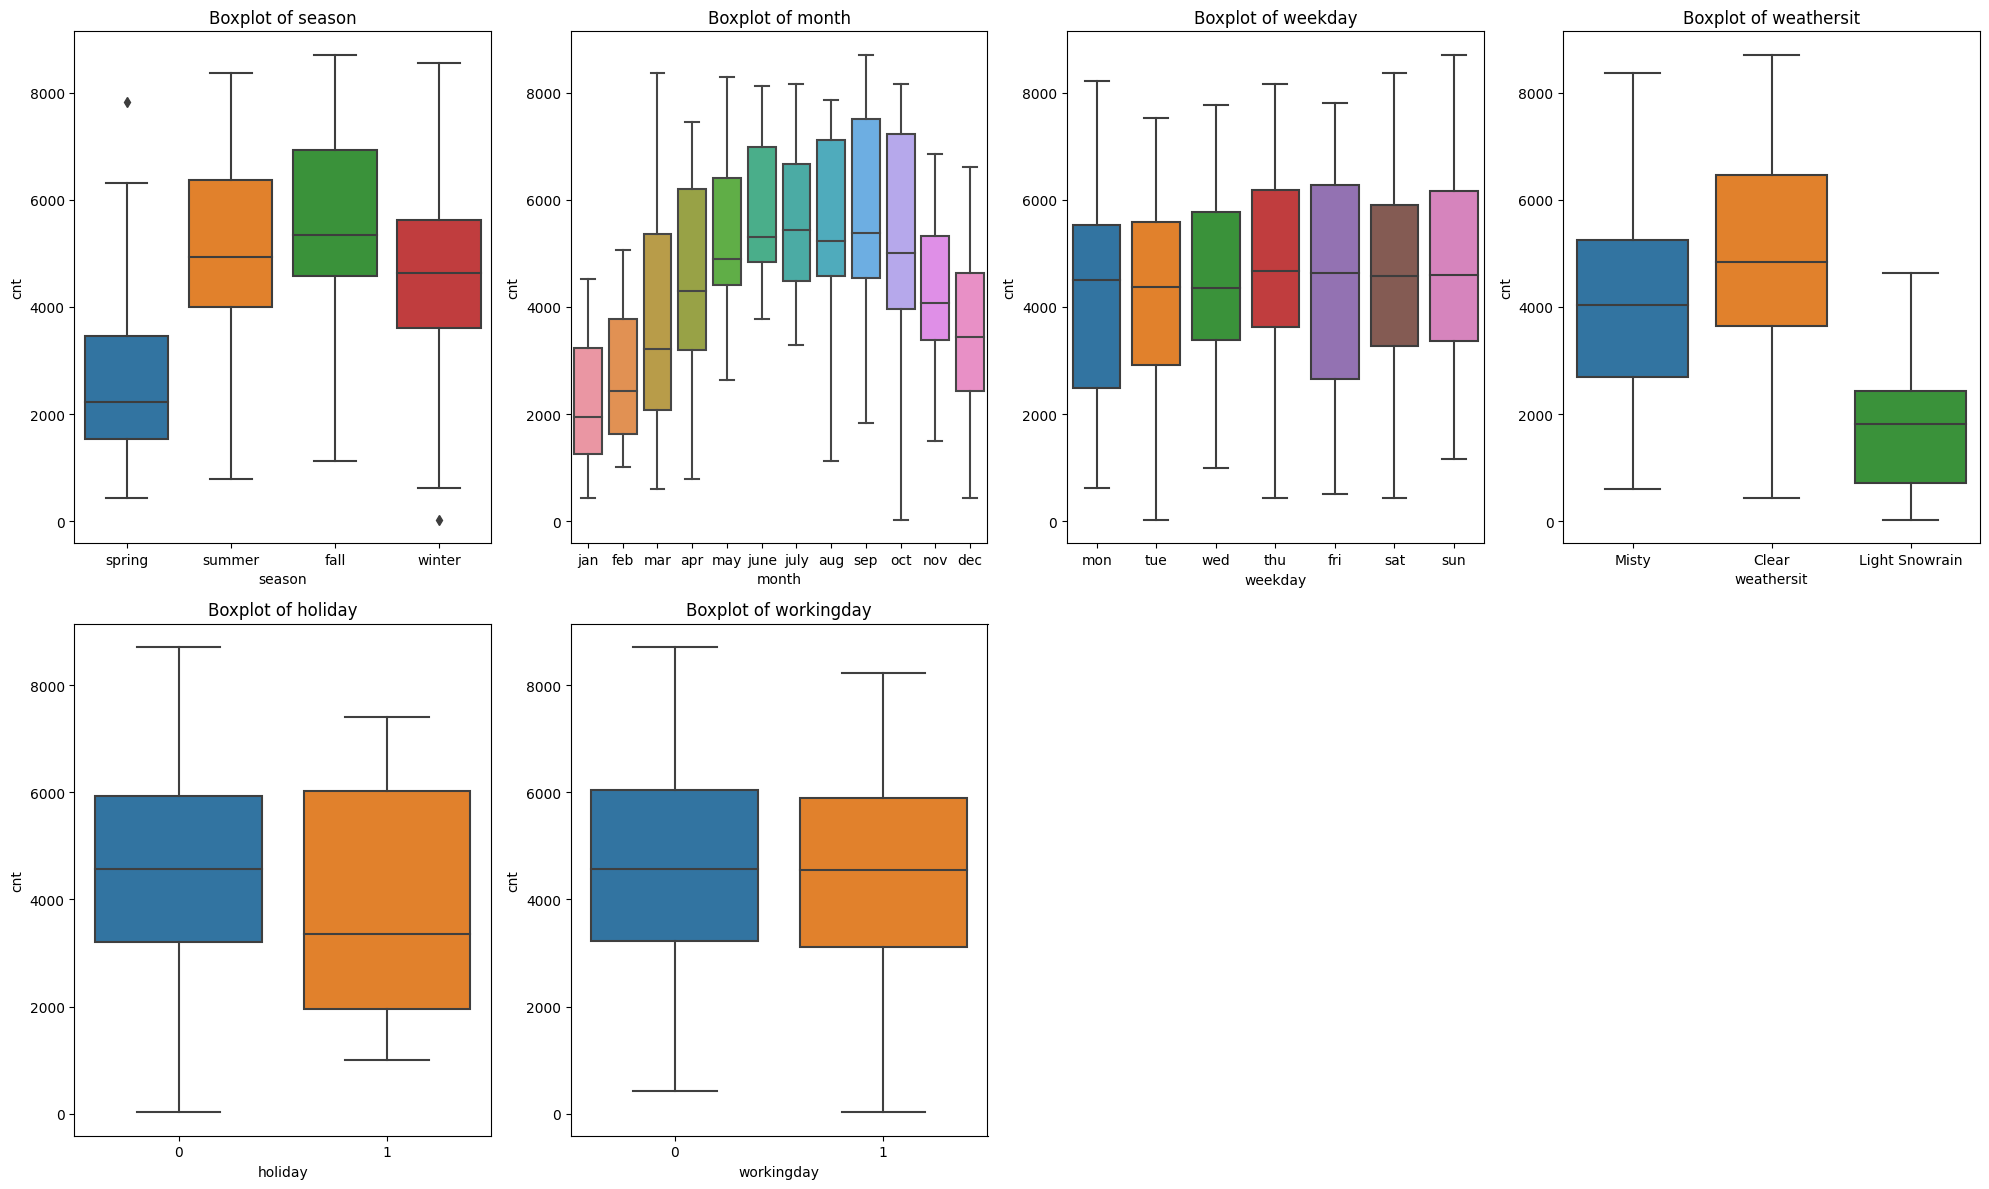

In [37]:
# visualing data by Boxplot

# Define the variables for box plots
variables = ['season', 'month', 'weekday', 'weathersit', 'holiday', 'workingday']

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through variables and create box plots
for i, variable in enumerate(variables):
    sns.boxplot(x=variable, y='cnt', data=bike, ax=axes[i])
    axes[i].set_title(f'Boxplot of {variable}')

# Remove any unused subplots
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display
plt.tight_layout()
plt.show()

1. season: The fall season makes 32% of total bike bookings with the median of over 5000 and followed by the summer(27%) and winter(25%). Therefore including season in building prediitive models can be worthwhile.

2. month: May, June, July, August and September makes almost 10% of total bike bookings with the medial of over 4000. So also including month in building preditive models can be worthwhile.

3. weekday: This variable shows a consistent(13.5% to 14.8%), evenly distributed trend in bike bookings across all days, suggesting it may have limited influence on building predictive model.

4. weathersit: Clear Weather has approximately 67% in bike bookings with the median 5000 and followed by the misty(30%) of bookings. So including weathersit in building preditive models may be worthwhile.

5. holiday: Remarkably, nearly 97.6% of bike bookings occur when it is not a holiday. So including holiday in building preditive models may be worthwhile.

6. workingday: Bike bookings in working days has approximately 69% with a median 5000. So including workingday in building preditive models may be worthwhile.

In [38]:
# barplot for categorical columns

# function for creating barplot for categorical columns with year
def barplot_with_cat(col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.barplot(x=col, y='cnt', data=bike, ax=axes[0])
    sns.barplot(x=col, y='cnt', data=bike, hue='year', palette='Set1', ax=axes[1])
    
    axes[1].legend(title='Year', labels=['2018', '2019'])
    
    plt.show()

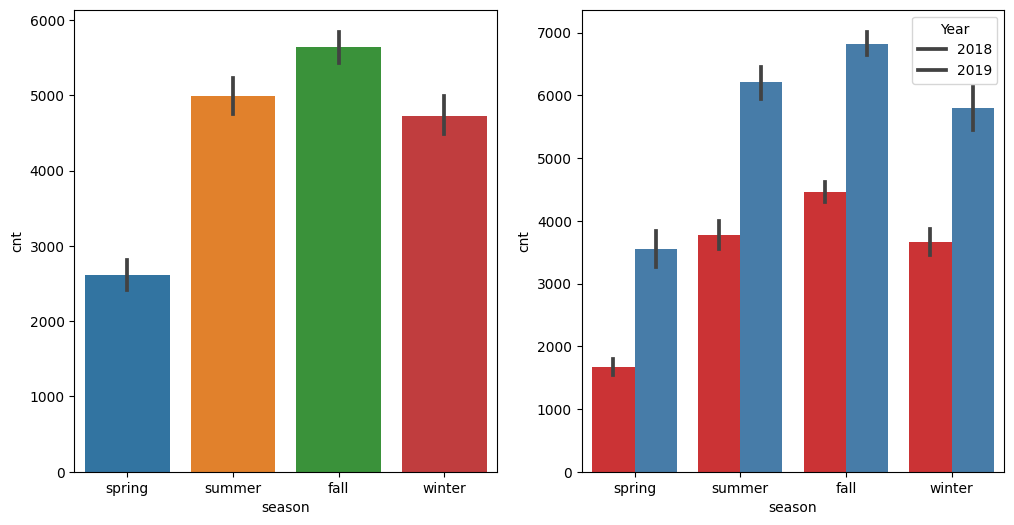

In [39]:
# barplot for season
barplot_with_cat('season')

The fall season has the most bookings and there has been increased from 2018 to 2019 in each season.

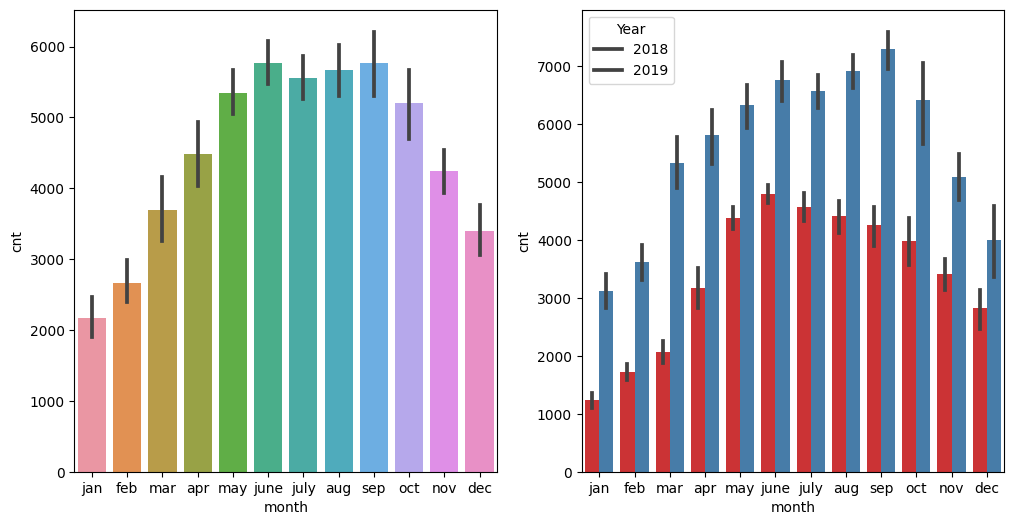

In [40]:
# barplot for month
barplot_with_cat('month')

May, June, July, August and September makes most of the bookings and steadily increased at the start of the year and desceased at the end of the year. From 2018 to 2019, the number of booking has been inscreased.

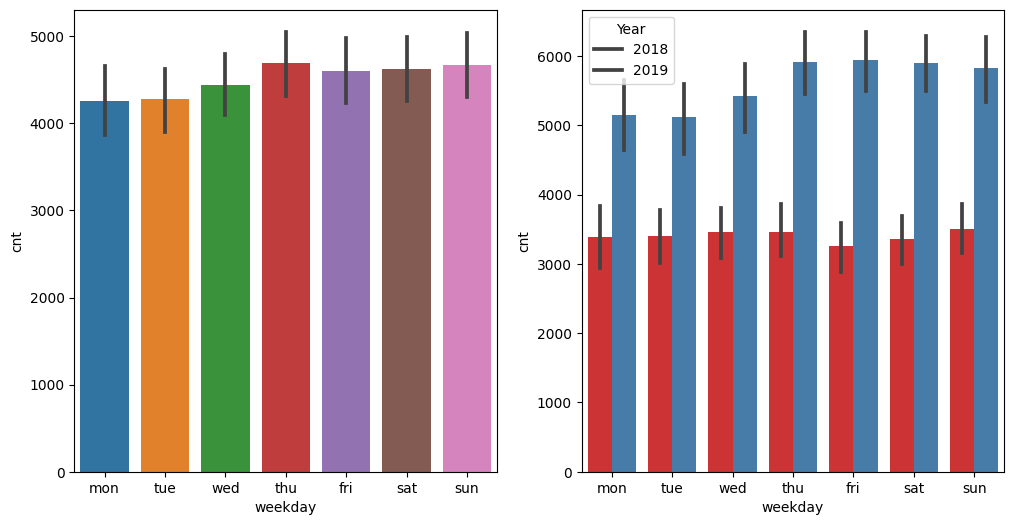

In [41]:
# barplot for weekday
barplot_with_cat('weekday')

There have more bookings in Thu, Fri, Sat, Sun than Mon, Tue, Wed.

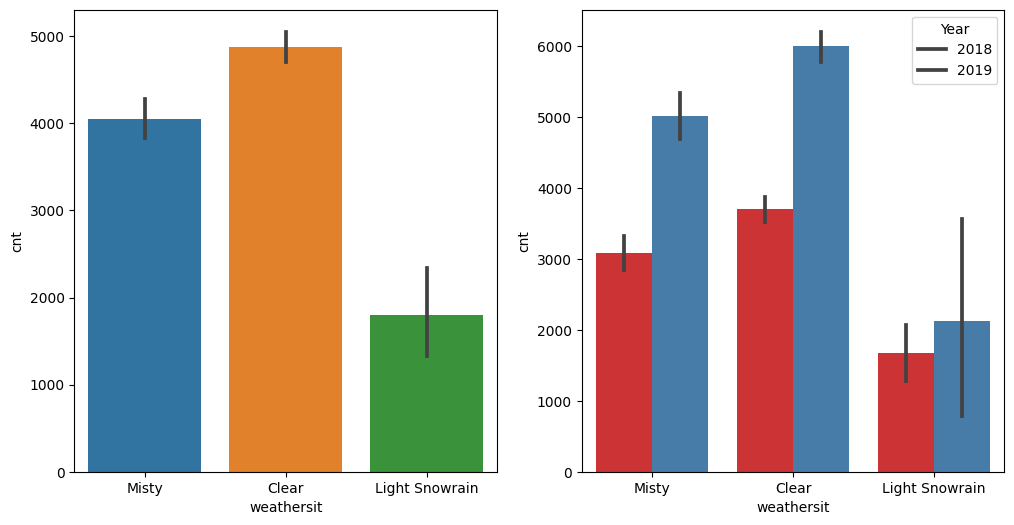

In [42]:
# barplot for weathersit
barplot_with_cat('weathersit')

There are more booking in Clear weather than the other weathers. In the comparison of two years, the number of bookings has been increased from 2018 to 2019. 

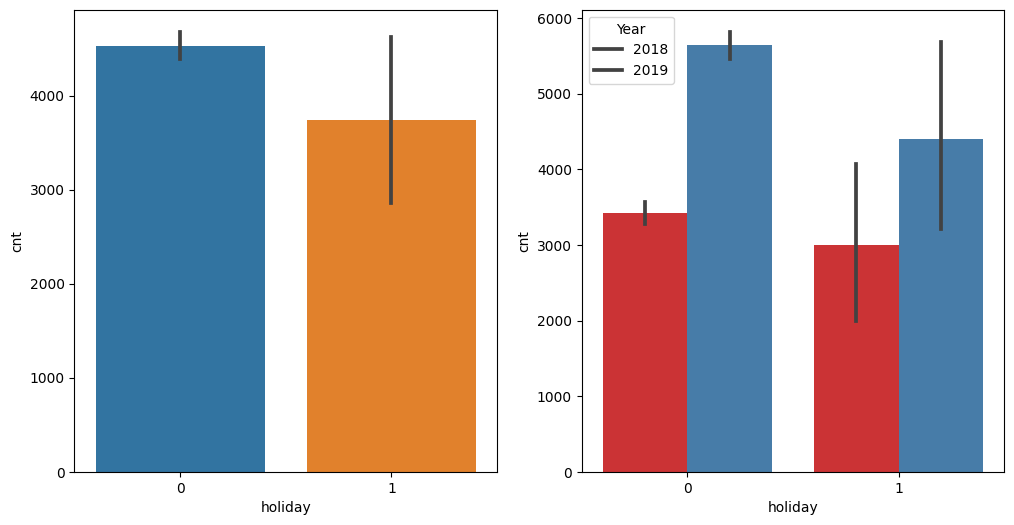

In [43]:
# barplot for holiday
barplot_with_cat('holiday')

There are more booking in not holiday.

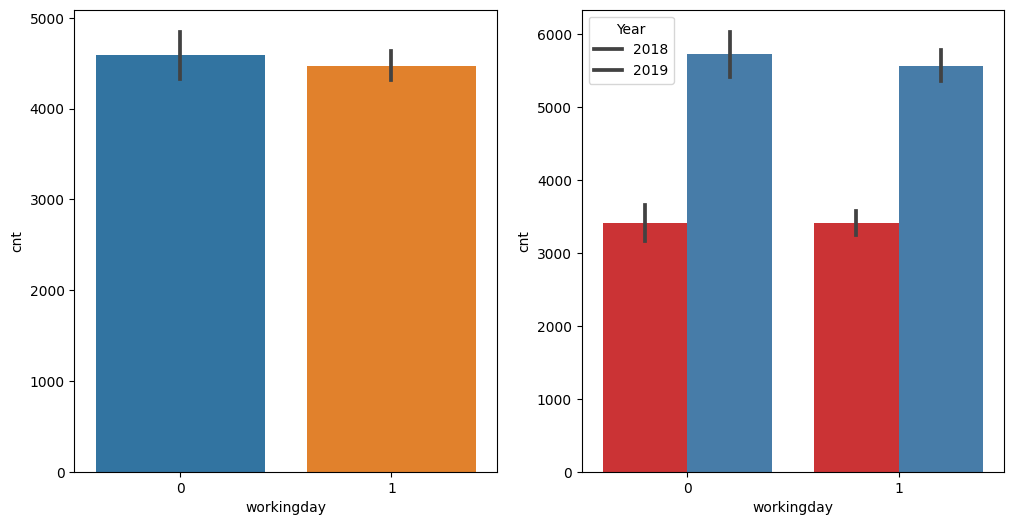

In [44]:
# barplot for workingday
barplot_with_cat('workingday')

There is not huge difference between workingday and not working data. But number of bookings from 2018 to 2019.

##### Visualizing Numerical Column

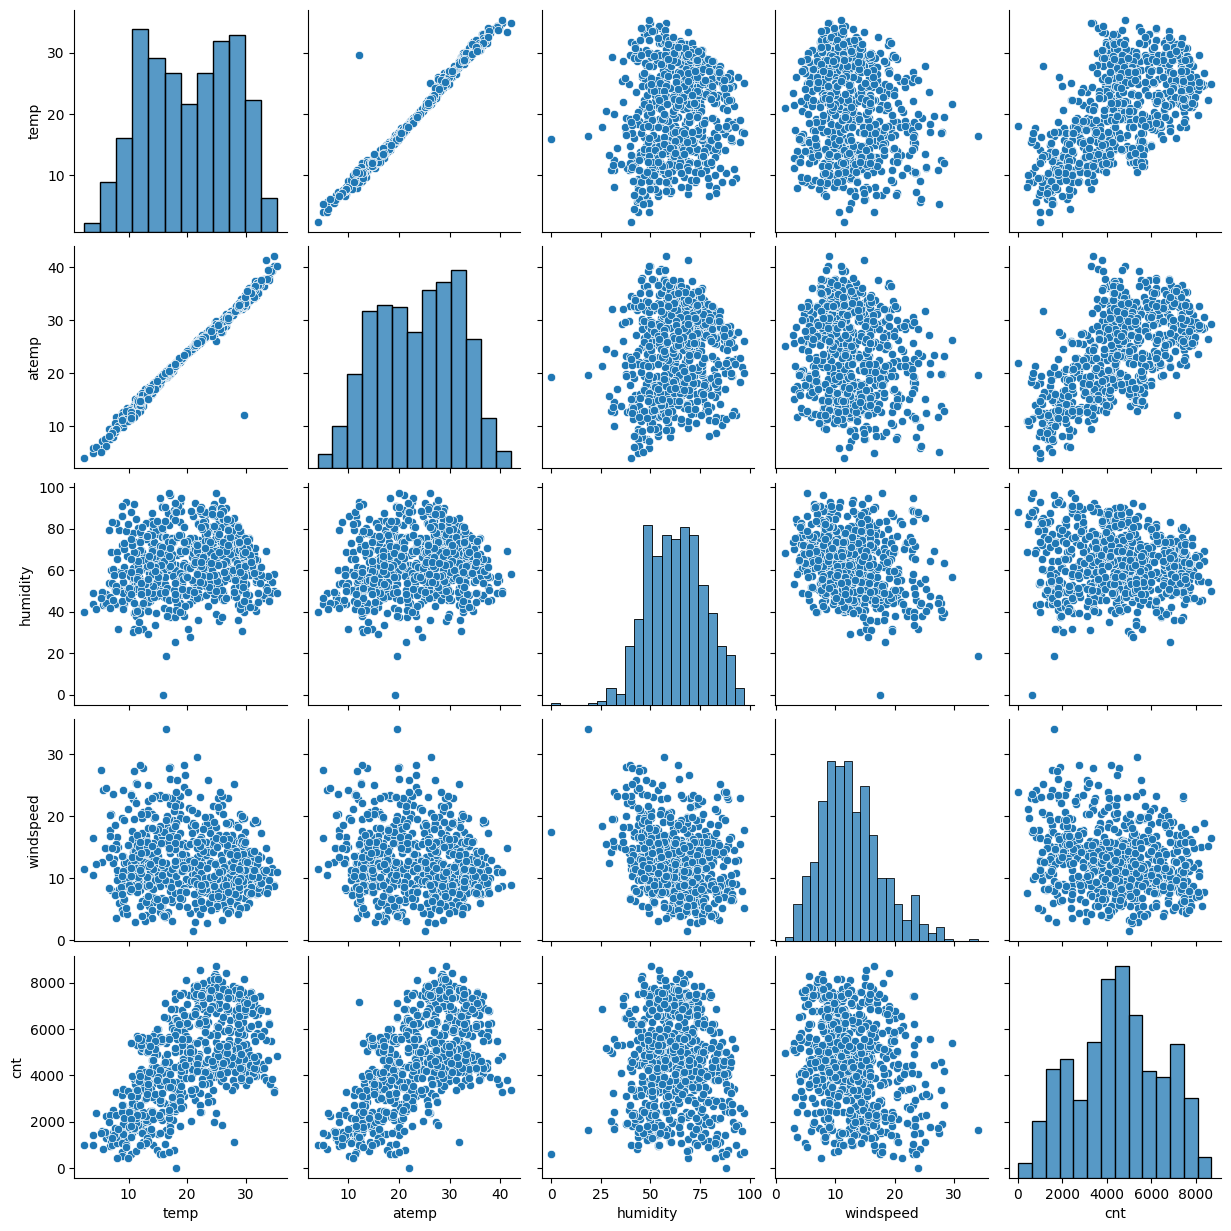

In [45]:
# visualizing numberical column
sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

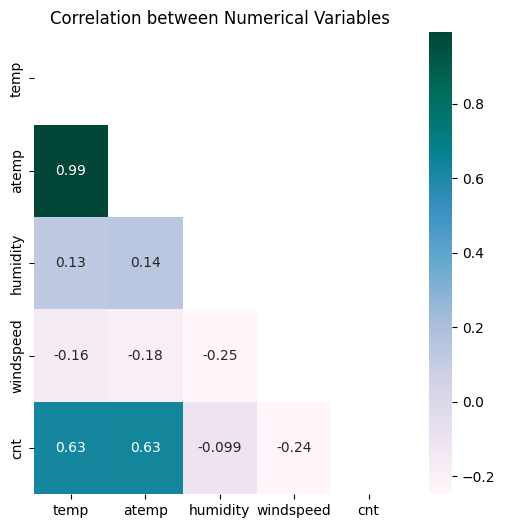

In [46]:
# correlation between numerical variables
plt.figure(figsize = (6,6))
matrix = np.triu(bike[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bike[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="PuBuGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is a liner relationship between temp and atemp. The selection of model feature will be relied on VIF and p-values with respect to other variables to determine which parameters to retain.


### Preparation of Data

##### Dummy Data Creation

In [47]:
# dummy data for season, month, weekday, weathersit
season_bike=pd.get_dummies(bike.season,drop_first=True).astype(np.uint8)
month_bike=pd.get_dummies(bike.month,drop_first=True).astype(np.uint8)
weekday_bike=pd.get_dummies(bike.weekday,drop_first=True).astype(np.uint8)
weathersit_bike=pd.get_dummies(bike.weathersit,drop_first=True).astype(np.uint8)

In [48]:
# before merging dummy to the original data, viewing data
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [49]:
# merging dummy data the original data
bike_new = pd.concat([bike,season_bike,month_bike,weekday_bike,weathersit_bike],axis=1)

In [50]:
# view merged data
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snowrain,Misty
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# view merged data information
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  spring          730 non-null    uint8  
 13  summer          730 non-null    uint8  
 14  winter          730 non-null    uint8  
 15  aug             730 non-null    uint8  
 16  dec             730 non-null    uint8  
 17  feb             730 non-null    uin

In [52]:
# dummy data created, dropped unnecessary columns
bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [53]:
# view head of the data after dropped
bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snowrain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# check shape of new data
bike_new.shape

(730, 30)

In [55]:
# check information of new data
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

### Splitting the Data into Training and Testing Sets

In [56]:
# creating training data and testing sets
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [57]:
# check training data shape
bike_train.shape

(510, 30)

In [58]:
# check test sets shape
bike_test.shape

(220, 30)

##### Rescaling Features

In [59]:
# MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [60]:
# viewing head of training data before rescaling features
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snowrain,Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,0,1


In [61]:
# set apply scaler to numerical columns
num_cols = ['temp','atemp','humidity','windspeed','cnt']
bike_train[num_cols] = scaler.fit_transform(bike_train[num_cols])

In [62]:
# viewing head of training data after rescaling features
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [63]:
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Correlation Matrix

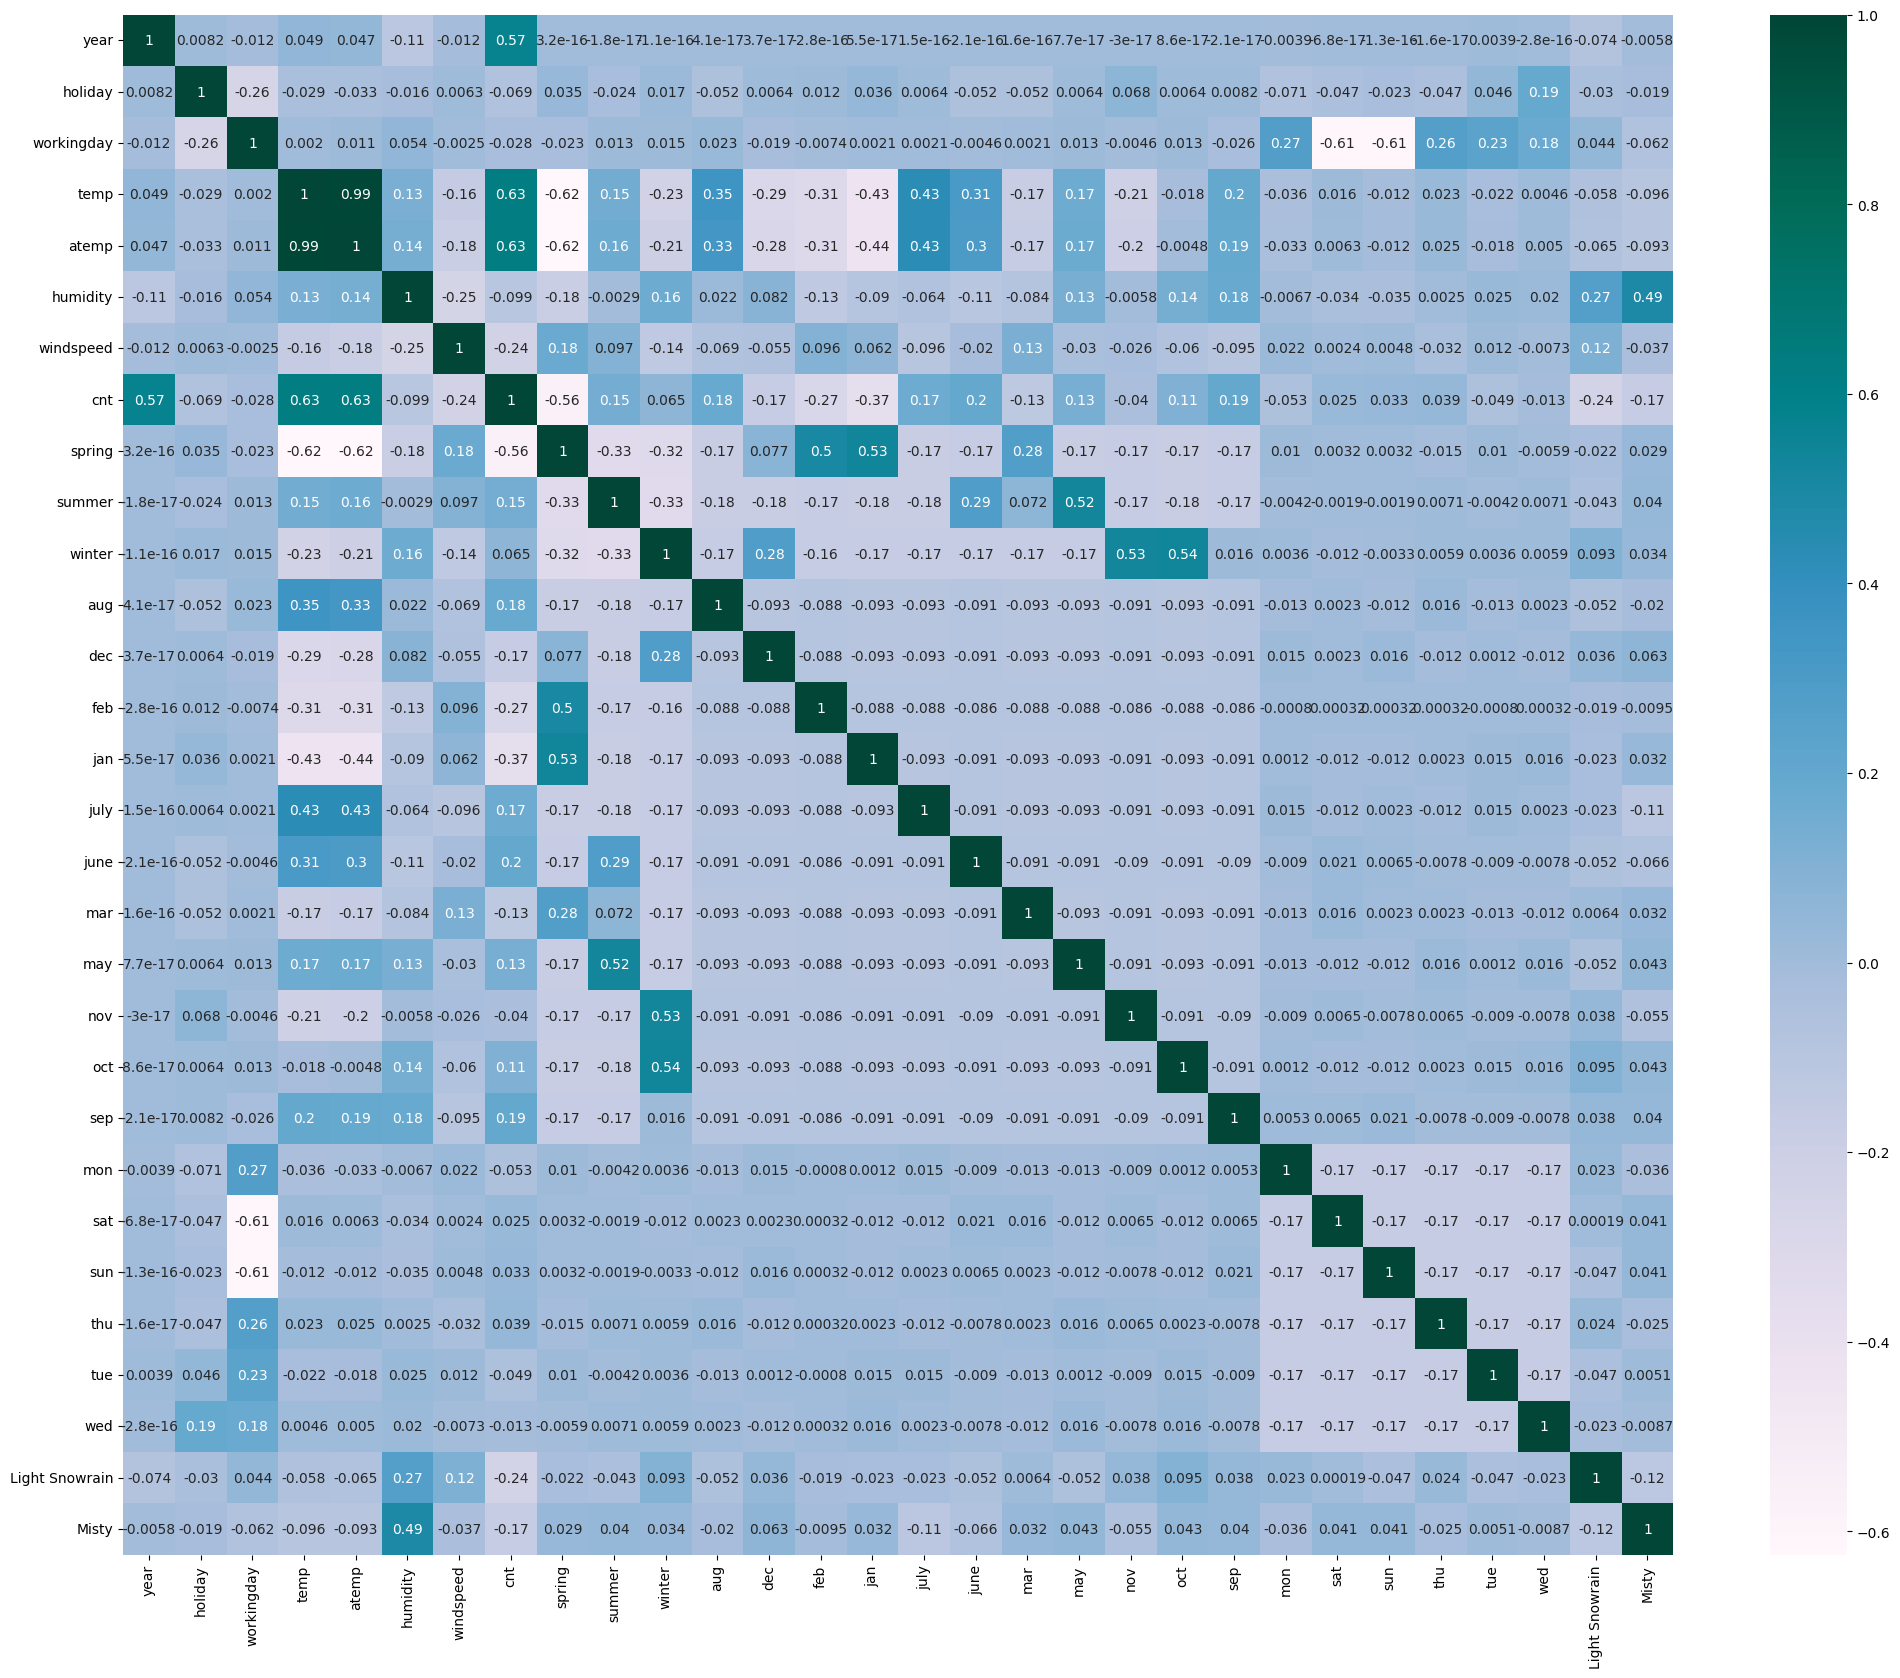

In [64]:
# check correlation coefficients to identify highly correlated variables
plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="PuBuGn")
plt.show()

cnt exhibit correlation with the year variable and temp. Likewise, Misty weather conditions and humidity demonstrate correlation. Additionally, a notable correlation is observed between the Spring season and the months of Jan and Feb, the Summer season and May, and the Winter season and Oct and Nov.

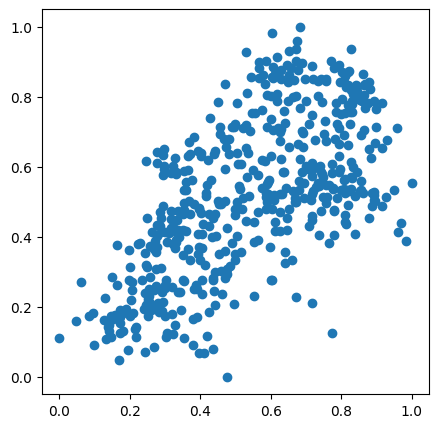

In [65]:
# visualizing a correlation with a Scatter plot to observe trends
plt.figure(figsize=[5,5])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

According to the above scatter plot, there is a positive correlation between cnt and temp.

##### Dividing into X and Y sets for the model building

In [66]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [67]:
# recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [68]:
# variables selected in the top 15 list.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light Snowrain', True, 1),
 ('Misty', True, 1)]

In [69]:
# selecting the chosen variables via RFE and storing them in the col
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'Light Snowrain',
       'Misty'],
      dtype='object')

In [70]:
# checking rejected columns
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [71]:
# create X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Model

In [72]:
# function to build model
def build_model(X_train):
    X_train_lm = sm.add_constant(X_train)
    lr = sm.OLS(y_train,X_train_lm).fit()

    return lr, X_train_lm

In [73]:
# function to calculate VIF
def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

##### Model 1

In [74]:
# check VIF
calculate_VIF(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Misty,2.32
0,year,2.09
11,nov,1.85
9,jan,1.75


humidity has highest VIF value

In [75]:
# build linear regression model 1
lr_1, X_train_lm_1 = build_model(X_train_rfe)

In [76]:
# check parameters
lr_1.params

const             0.319667
year              0.230404
holiday          -0.091089
temp              0.481503
humidity         -0.162213
windspeed        -0.188726
spring           -0.061255
summer            0.042337
winter            0.101921
dec              -0.035461
jan              -0.043411
july             -0.055250
nov              -0.038701
sep               0.075467
Light Snowrain   -0.246481
Misty            -0.054300
dtype: float64

In [77]:
# view summary of model
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          8.15e-189
Time:                        00:06:09   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.859      0.000       0.249       0.391
year               0.2304      0.008     28.487      0.000       0.215       0.246
holiday           -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp               0.4815      0.037     13.005      0.000       0.409       0.554
humidity          -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed         -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring            -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer             0.0423      0.015      2.761      0.006       0.012       0.072
winter             0.1019      0.018      5.656      0.000       0.067       0.137
dec               -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan               -0.0434      0.018     -2.393      0.017      -0.079      -0.008
july              -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov               -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep                0.0755      0.017      4.466      0.000       0.042       0.109
Light Snowrain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Misty             -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model 2

In [78]:
# humidity has high VIF values, so drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

In [79]:
# check VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
10,nov,1.81
8,jan,1.66
9,july,1.59
13,Misty,1.57


The VIF values appear to be within an acceptable range now.

In [80]:
# build linear regression model 2
lr_2, X_train_lm_2 = build_model(X_train_new)

In [81]:
# check params
lr_2.params

const             0.245029
year              0.234455
holiday          -0.091776
temp              0.438717
windspeed        -0.158482
spring           -0.071257
summer            0.034890
winter            0.086883
dec              -0.042806
jan              -0.050008
july             -0.050046
nov              -0.039513
sep               0.068730
Light Snowrain   -0.291749
Misty            -0.080073
dtype: float64

In [82]:
# view summary of model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          4.75e-186
Time:                        00:06:10   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.618      0.000       0.182       0.308
year               0.2345      0.008     28.687      0.000       0.218       0.251
holiday           -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp               0.4387      0.036     12.093      0.000       0.367       0.510
windspeed         -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring            -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer             0.0349      0.015      2.251      0.025       0.004       0.065
winter             0.0869      0.018      4.831      0.000       0.052       0.122
dec               -0.0428      0.018     -2.413      0.016      -0.078      -0.008
jan               -0.0500      0.018     -2.719      0.007      -0.086      -0.014
july              -0.0500      0.019     -2.703      0.007      -0.086      -0.014
nov               -0.0395      0.019     -2.064      0.040      -0.077      -0.002
sep                0.0687      0.017      4.015      0.000       0.035       0.102
Light Snowrain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Misty             -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model 3

In [83]:
# nov variable has high p-value, so drop it
X_train_new = X_train_new.drop(['nov'], axis = 1)

In [84]:
# check VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,year,2.07
6,winter,2.05
8,jan,1.65
9,july,1.59
12,Misty,1.57
10,sep,1.34


The VIF values appear to be relatively stable even after dropping nov variable.

In [85]:
# build linear regression model 3
lr_3, X_train_lm_3 = build_model(X_train_new)

In [86]:
# check params
lr_3.params

const             0.228272
year              0.234275
holiday          -0.098193
temp              0.458108
windspeed        -0.159364
spring           -0.063192
summer            0.040370
winter            0.077434
dec              -0.028270
jan              -0.045128
july             -0.049881
sep               0.074195
Light Snowrain   -0.287829
Misty            -0.079315
dtype: float64

In [87]:
# view summary of model
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          2.74e-186
Time:                        00:06:10   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.310      0.000       0.167       0.290
year               0.2343      0.008     28.573      0.000       0.218       0.250
holiday           -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp               0.4581      0.035     13.031      0.000       0.389       0.527
windspeed         -0.1594      0.025     -6.291      0.000      -0.209      -0.110
spring            -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer             0.0404      0.015      2.635      0.009       0.010       0.070
winter             0.0774      0.017      4.438      0.000       0.043       0.112
dec               -0.0283      0.016     -1.731      0.084      -0.060       0.004
jan               -0.0451      0.018     -2.467      0.014      -0.081      -0.009
july              -0.0499      0.019     -2.686      0.007      -0.086      -0.013
sep                0.0742      0.017      4.373      0.000       0.041       0.108
Light Snowrain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
Misty             -0.0793      0.009     -9.089      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model 4

In [88]:
# dec variable has high p-value, so drop it
X_train_new = X_train_new.drop(['dec'], axis = 1)

In [89]:
# check VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,year,2.07
6,winter,1.78
7,jan,1.61
8,july,1.59
11,Misty,1.56
9,sep,1.34


The VIF values appear to be relatively stable even after dropping dec variable.

In [90]:
# build linear regression model 4
lr_4, X_train_lm_4 = build_model(X_train_new)

In [91]:
# check params
lr_4.params

const             0.215392
year              0.234283
holiday          -0.096758
temp              0.472115
windspeed        -0.154916
spring           -0.061696
summer            0.043385
winter            0.075655
jan              -0.038259
july             -0.050347
sep               0.076399
Light Snowrain   -0.285425
Misty            -0.079277
dtype: float64

In [92]:
# view summary of model
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          8.14e-187
Time:                        00:06:10   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.088      0.000       0.156       0.275
year               0.2343      0.008     28.517      0.000       0.218       0.250
holiday           -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp               0.4721      0.034     13.772      0.000       0.405       0.539
windspeed         -0.1549      0.025     -6.135      0.000      -0.205      -0.105
spring            -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer             0.0434      0.015      2.845      0.005       0.013       0.073
winter             0.0757      0.017      4.335      0.000       0.041       0.110
jan               -0.0383      0.018     -2.138      0.033      -0.073      -0.003
july              -0.0503      0.019     -2.706      0.007      -0.087      -0.014
sep                0.0764      0.017      4.506      0.000       0.043       0.110
Light Snowrain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Misty             -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model 5

In [93]:
# jan variable has high p-value, so drop it
X_train_new = X_train_new.drop(['jan'], axis = 1)

In [94]:
# check VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
7,july,1.58
10,Misty,1.55
8,sep,1.34
9,Light Snowrain,1.08


The VIF values appear to be relatively stable even after dropping jan variable.

In [95]:
# build linear regression model 5
lr_5, X_train_lm_5 = build_model(X_train_new)

In [96]:
# check params
lr_5.params

const             0.199434
year              0.233570
holiday          -0.097463
temp              0.490988
windspeed        -0.147919
spring           -0.067169
summer            0.046487
winter            0.081741
july             -0.052057
sep               0.076846
Light Snowrain   -0.284199
Misty            -0.080167
dtype: float64

In [97]:
# view summary of model
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          5.06e-187
Time:                        00:06:10   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.746      0.000       0.141       0.258
year               0.2336      0.008     28.352      0.000       0.217       0.250
holiday           -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp               0.4910      0.033     14.770      0.000       0.426       0.556
windspeed         -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring            -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer             0.0465      0.015      3.051      0.002       0.017       0.076
winter             0.0817      0.017      4.730      0.000       0.048       0.116
july              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep                0.0768      0.017      4.517      0.000       0.043       0.110
Light Snowrain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Misty             -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model 6

In [98]:
# july variable has high p-value, so drop it
X_train_new = X_train_new.drop(['july'], axis = 1)

In [99]:
# check VIF for the new model
calculate_VIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Misty,1.55
7,sep,1.23
8,Light Snowrain,1.08
1,holiday,1.04


The VIF values now appear satisfactory, as they have dropped below 5.

In [100]:
# build linear regression model 6
lr_6, X_train_lm_6 = build_model(X_train_new)

In [101]:
# check params
lr_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
spring           -0.055406
summer            0.062076
winter            0.094476
sep               0.090998
Light Snowrain   -0.285031
Misty            -0.078741
dtype: float64

In [102]:
# view summary of model
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          1.47e-186
Time:                        00:06:10   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.447      0.000       0.133       0.249
year               0.2341      0.008     28.237      0.000       0.218       0.250
holiday           -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp               0.4777      0.033     14.423      0.000       0.413       0.543
windspeed         -0.1481      0.025     -5.854      0.000      -0.198      -0.098
spring            -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer             0.0621      0.014      4.350      0.000       0.034       0.090
winter             0.0945      0.017      5.630      0.000       0.062       0.127
sep                0.0910      0.016      5.566      0.000       0.059       0.123
Light Snowrain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Misty             -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 6 exhibits low multicollinearity among predictors, and all predictor variables have statistically significant p-values.

### Residual Analysis of the train data

In [103]:
y_train_pred = lr_6.predict(X_train_lm_6)

##### Error Terms

Text(0.5, 0, 'Errors (y_train - y_train_pred)')

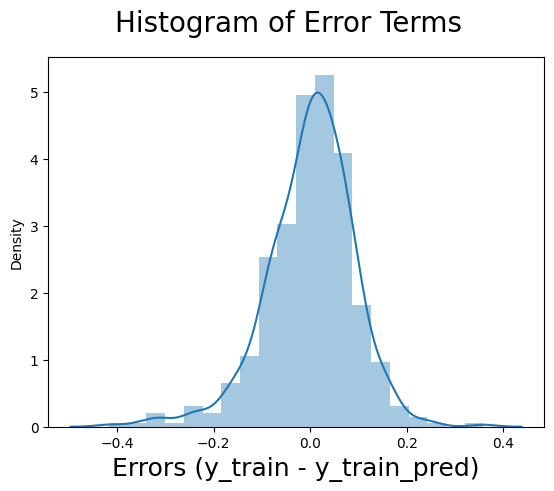

In [104]:
# Plot the histogram of the error terms
fig = plt.figure()
Errors = y_train - y_train_pred
sns.distplot(Errors, bins = 20)
fig.suptitle('Histogram of Error Terms', fontsize = 20) 
plt.xlabel('Errors (y_train - y_train_pred)', fontsize = 18)

In [105]:
# mean of Errors
np.mean(Errors)

-1.9239511944386535e-15

The error terms conform to a normal distribution with mean approximately zero.

##### Constant Variance(homoscedasticity)

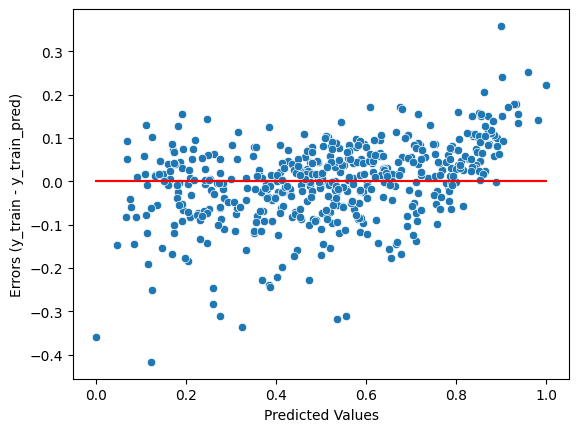

In [106]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.xlabel('Predicted Values')
plt.ylabel('Errors (y_train - y_train_pred)')
plt.plot(y_train,(y_train - y_train), '-r')
plt.show()

Additionally, the scatter plot above reveals that the spread of data points does not exhibit a substantial increase. Therefore, can infer that our error terms display constant variance, indicating homoscedasticity.

##### Multicollinearity

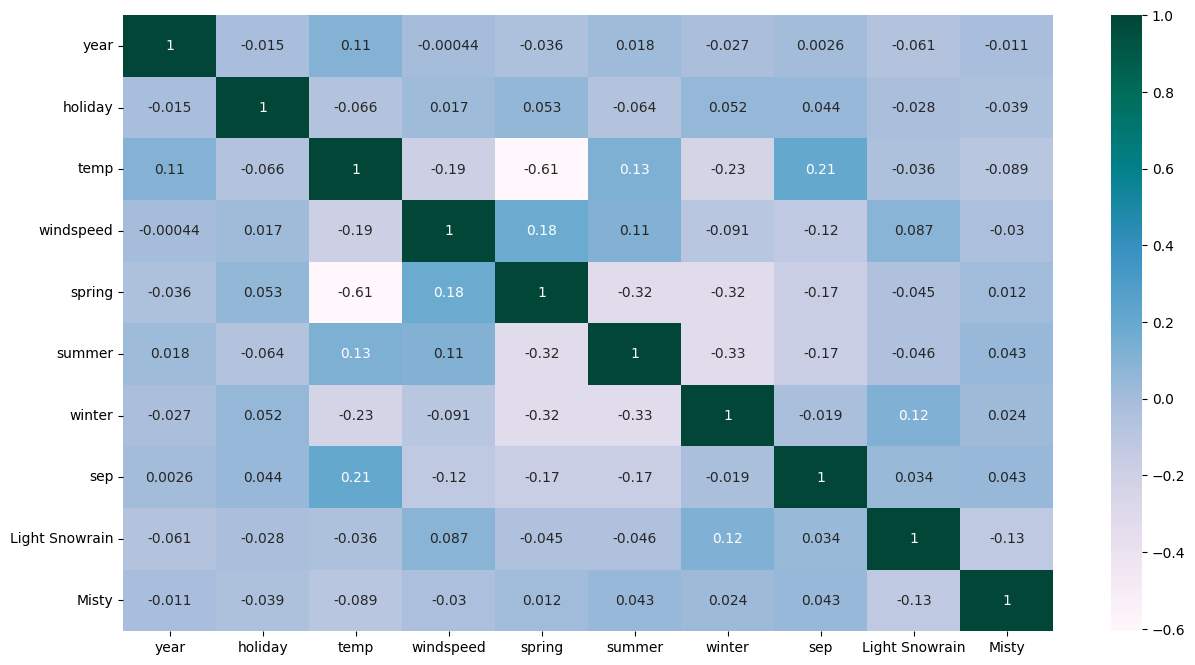

In [107]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="PuBuGn")
plt.show()

In [108]:
# check VIF
calculate_VIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Misty,1.55
7,sep,1.23
8,Light Snowrain,1.08
1,holiday,1.04


According to the heatmap and VIF values are less than 5, so there is no multicolinearity.

### Making Predictions

In [109]:
# create scaling test
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [110]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Divide Test data into X and Y

In [111]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [112]:
X_test.shape

(220, 29)

In [113]:
y_test.shape

(220,)

In [114]:
X_test = X_test[X_train_new.columns]

# add constant
X_test_lm_6 = sm.add_constant(X_test)

In [115]:
# make preditions
y_test_pred = lr_6.predict(X_test_lm_6)

### Model Evaluation

In [116]:
# evaludate model
test_r2 = r2_score(y_test, y_test_pred)
test_r2

0.8038195990728842

In [117]:
# adjusted R-squared
n = X_test.shape[0]    # No. of rows of test data
p = X_test.shape[1]    # No. of columns of test data

# formula: Adj R^2 = (1−(1−R^2)∗(n−1)/(n−p−1))
test_adj_r2 = (1-(1-test_r2)*(n-1)/(n-p-1))
test_adj_r2

0.7944329770189553

Text(0, 0.5, 'y_pred')

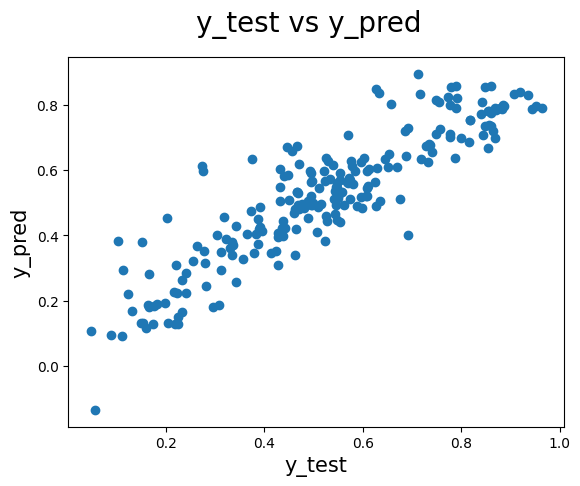

In [118]:
# scatter plot between y_test and y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 15) 

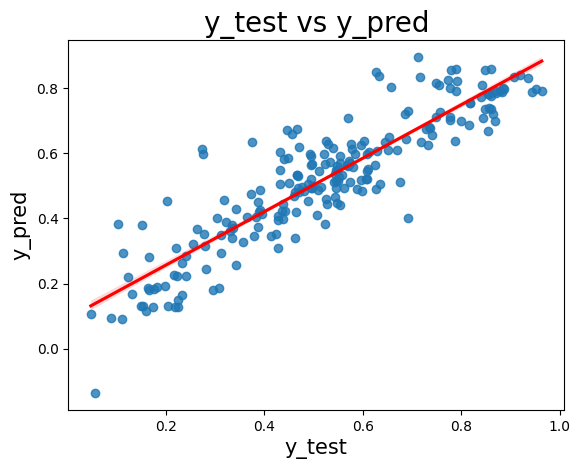

In [119]:
# visualizing fit on the test data
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)
plt.show()

### Result Comparison

In [120]:
# Train R^2
print(f'Train R^2           :  {round(lr_6.rsquared, 3)}')

# Train Adjusted R^2
print(f'Train Adjusted R^2  :  {round(lr_6.rsquared_adj, 3)}')

# Test R^2
print(f'Test R^2            :  {round(test_r2, 3)}')

# Test Adjusted R^2
print(f'Test Adjusted R^2   :  {round(test_adj_r2, 3)}')

Train R^2           :  0.833
Train Adjusted R^2  :  0.829
Test R^2            :  0.804
Test Adjusted R^2   :  0.794


### Conclusion

According to the final model, top three predictor varaibles are:
1. temp: The coefficient value of 0.477737 for the temp variable means that for every one-unit increase in temperature, there is a corresponding increase of 0.477737 units in the number of bike hires. This indicates a positive linear relationship between temperature and bike rentals, suggesting that as the temperature rises, more people tend to rent bikes.

2. Light Snowrain: The coefficient value of -0.285031 suggests that a one-unit increase in the presence of Light Snowrain is associated with a decrease of 0.285031 units in the number of bike rentals. This indicates that when there is light snow or rain, there tends to be a reduction in bike rentals by approximately 0.285031 units, all else being equal.

3. year: The coefficient value of 0.234132 means that for every one-unit increase in the year variable, there is a corresponding increase of 0.234132 units in the number of bike rentals. This suggests that as time (years) progresses, there is a positive effect on bike rentals, with an increase of approximately 0.234132 units per year, all else being equal.

Therefore, in order to achieve the highest level of booking, recommend prioritizing these variables such as temperature and time of year, have a noticeable impact on bookings, so focusing on them can help maximize bookings.